In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from collections import Counter

## 셀린느

In [3]:
mag_ce = pd.read_csv('./magazine/final/magazine_ce_stickword.csv', sep ='|', encoding = 'utf-8')

In [4]:
mag_ce

,magazine,brand,title,link,date,word_celine,ADFN,ADFN_2
0,A,Ce,코트 체크,http://www.allurekorea.com/2020/11/10/%ec%bd%9...,2020-11-10,"골드 잠금 장식으로 포인트를 준 케이프 체크 코트는 1백9만원, 산드로(SANDRO...","['골드', '장식', '포인트', '준', '케이프', '체크', '코트', '백...","['골드', '장식', '포인트', '준', '케이프', '체크', '코트', '백..."
1,A,Ce,데님이여 영원하라,http://www.allurekorea.com/2020/11/06/%eb%8d%b...,2020-11-06,"빈티지한 주름과 워싱이 특징인 데님 팬츠는 가격미정, CELINE(CELINE).","['빈티', '한', '주름', '워싱', '특징', '데님', '팬츠', 'CEL...","['빈티지', '한', '주름', '워싱', '특징', '데님', '팬츠', 'CE..."
2,A,Ce,남자 백’까지 갖고 싶어,http://www.allurekorea.com/2020/11/04/%eb%82%a...,2020-11-04,1970년대 에스닉한 분위기가 물씬 풍기는 CELINE의 방패 모양 숄더백.,"['대', '에스', '닉', '분위기', '물씬', 'CELINE', '방패', ...","['대', 에스닉, '분위기', '물씬', 'CELINE', '방패', '모양', ..."
3,A,Ce,예림-예리,http://www.allurekorea.com/2020/11/03/%ec%98%8...,2020-11-03,"재킷, 셔츠, 슈즈는 CELINE(CELINE), 블랙 스커트는 렉토, 이어링은 스...","['재킷', '셔츠', '슈즈', 'CELINE', 'CELINE', '블랙', '...","['재킷', '셔츠', '슈즈', 'CELINE', 'CELINE', '블랙', '..."
4,A,Ce,"GOOD TIME, 헨리",http://www.allurekorea.com/2020/10/26/good-tim...,2020-10-26,"재킷, 셔츠, 네크리스는 모두 CELINE(CELINE), 팬츠는 다잉브리드, 슈즈...","['재킷', '셔츠', '크리스', 'CELINE', 'CELINE', '팬츠', ...","['재킷', '셔츠', '크리스', 'CELINE', 'CELINE', '팬츠', ..."
...,...,...,...,...,...,...,...,...
759,W,Ce,G의 역습,http://www.wkorea.com/2016/11/15/g%ec%9d%98-%e...,2016-11-15,마야 셀리아 샐리(MAYA CELIA SALLY)N2017 S/S CELINE의 쇼...,"['마야', '셀', '리아', 'Maya', 'Celia', 'Sally', 'S...","['마야', '셀', '리아', 'Maya', 'Celia', 'Sally', SS..."
760,W,Ce,잊지 마 2,http://www.wkorea.com/2016/09/28/%ec%9e%8a%ec%...,2016-09-28,"코리아 파워, 록(ROKH)N지난해 S/S에 파리에서 데뷔한 32세 한국 디자이너 ...","['코리아', '파워', '록', 'Rokh', '지난해', 'S', 'S', '파...","['코리아', '파워', '록', 'Rokh', '지난해', SS, '파리', '데..."
761,W,Ce,사고 말겠어!,http://www.wkorea.com/2016/09/21/%ec%82%ac%ea%...,2016-09-21,패션 에디터 김신N가을이 다가오니 괜스레 감상적이 된다. 정제된 보헤미안 감성과 함...,"['패션', '에디터', '김신', '가을', '괜스레', '감상', '정제', '...","['패션', '에디터', '김신', '가을', '괜스레', '감상', '정제', '..."
762,W,Ce,남다르게,http://www.wkorea.com/2016/09/08/%eb%82%a8%eb%...,2016-09-08,"허리에 가방N주머니인 듯 아닌 듯, 벨트인 듯 아닌 듯 허리 가방’에 새로운 생명을...","['허리', '가방', '주머니', '듯', '아닌', '듯', '벨트', '듯',...","['허리', '가방', '주머니', '듯', '아닌', '듯', '벨트', '듯',..."


In [5]:
mag_ce['word'] = mag_ce['word_celine']

In [6]:
mag_CE = mag_ce[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [7]:
len(mag_CE)

764

In [15]:
idx3 = []
for i in range(len(mag_CE)):
    if i % 3 == 0 :
        idx3.append(i)

In [16]:
mag_CE3 = mag_CE.loc[idx3]

In [17]:
mag_CE3.reset_index(drop = True, inplace = True)

In [18]:
len(mag_CE3)

255

## 로제

### 제니 (유튜브 + 매거진)

In [9]:
tot_ro = pd.read_csv('./tot_rose_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [10]:
tot_ro

,magazine,brand,title,word_rose,ADFN,ADFN_2
0,Allure,R,3억뷰 돌파 블랙핑크 뮤비 메이크업의 비밀은? 담당 메이크업 아티스트 직접 등판!,['32시간만에 1억뷰 돌파! 블랙핑크의 ‘How you like that’ 뮤직비...,"['32시간', '만에', '1억', '뷰', '돌파', '!', '블랙', '핑크...","['32시간', '만에', '1억', '뷰', '돌파', '!', BLACKPINK..."
1,B,R,잘 고른 여름 원피스 한 벌,"['블랙핑크 로제', '시폰 드레스를 블랙핑크 로제처럼 쿨하게 연출하고 싶다면? 플...","['블랙', '핑크', '로제', ""',"", ""'"", '시폰', '드레스', '를'...","[BLACKPINK, '로제', ""',"", ""'"", '시폰', '드레스', '를',..."
2,B,R,"난리 난 블랙핑크의 네일아트, 왜?",['번짐 기법을 활용한 변형된 레오파드 패턴을 선보인 로제. 화이트 베이스 위에 브...,"['번짐', '기법', '을', '활용', '한', '변형', '된', '레오파드'...","['번짐', '기법', '을', '활용', '한', '변형', '된', '레오파드'..."
3,B,R,방탄소년단 뷔도 착용한 가을 액세서리는 무엇?,"['폭이 좁고 길어 치렁치렁한 느낌 없이 색다른 변화를 손쉽게 줄 수 있으니까.',...","['폭', '이', '좁고', '길어', '치렁치렁', '한', '느낌', '없이'...","['폭', '이', '좁고', '길어', '치렁치렁', '한', '느낌', '없이'..."
4,B,R,무더위엔 원피스 한 벌이면 충분해!,"['오버사이즈 티셔츠를 원피스처럼 연출한 블랙핑크 로제.', ' 타이다이 패턴 하나...","['오버', '사이즈', '티셔츠', '를', '원피스', '처럼', '연출', '...","['오버', '사이즈', '티셔츠', '를', '원피스', '처럼', '연출', '..."
...,...,...,...,...,...,...
135,YOUTUBE,R,세상 귀욤()열매 혼자 다 먹은듯한 블랙핑크 로제 인스타라이브 (feat_ 지수_ ...,['지수 말투 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 연예인이지만 전형적인 10...,"['지수', '말투', 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', '연예인',...","['지수', '말투', 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', '연예인',..."
136,YOUTUBE,R,세상에 로제도 데이터 걱정한다_인스타라이브 [블랙핑크로제]_korean_commen...,"['박로제 진짜 매력은 가창력, 춤, 몸매가 아닌 순박함과 멍챙함인 듯ㅋㅋㅋㅌㅌㅌ'...","['박로', '제', '진짜', '매력', '은', '가창력', ',', '춤', ...","[로제, '진짜', '매력', '은', '가창력', ',', '춤', ',', '몸..."
137,YOUTUBE,R,스타일리스트가 분석한 로제 패션이 진짜 넘사벽인 이유_korean_comment.csv,"['로제가 진짜 보석인듯', '솔직히 BLACKPINK는 맴버하나하나 다 패션분석쌉...","['로제', '가', '진짜', '보석', '인', '듯', ""',"", ""'"", '...","['로제', '가', '진짜', '보석', '인', '듯', ""',"", ""'"", '..."
138,YOUTUBE,R,아무데서나 볼 수 없을걸요 로제 커버 화보 촬영현장 비하인드 대방출! by W Ko...,['영어 자막이 추가되었습니다! 즐겁게 감상 부탁드려요 :)English subti...,"['영어', '자막', '이', '추가', '되었습니다', '!', '즐겁게', '...","['영어', '자막', '이', '추가', '되었습니다', '!', '즐겁게', '..."


In [11]:
tot_ro['word'] = tot_ro['word_rose']

In [12]:
tot_R = tot_ro[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [13]:
len(tot_R)

140

### 셀린느 + 제니

In [19]:
CE3R = pd.concat([mag_CE3, tot_R])

In [20]:
CE3R.reset_index(drop = True, inplace = True)

In [21]:
CE3R.to_csv('./magazine/final/CE3R.csv', sep = '|', encoding = 'utf-8', index = False)

In [22]:
len(CE3R)

395

## stopword 추가

In [34]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [35]:
sw_df.columns = ['stopword']

In [36]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [37]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [38]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [39]:
add_0 = ['진짜', '존나', '보고', '그냥', '카이', '이광수', '광수', '런닝맨', '❤️', '없는', '유재석', '❤', '♥', '있고', '거', 
         '내', '더', '개', '사람', '영상', '광고', '언니', '말', '뭐', '수', '생각',
        '있는', '정말', '같은', '같음', '듯', '♡', '완전', '같아', '정도', '지금', '역시', '뭔가', '입니다', '때문', '아니라',
         '함', '같은데', '해', '하는', '할', '넘', '한', '안', '했다', '보면', '데', '하고', '하면', '게', '해서', '봐도', 
         '한다', '된', '건', '요', '움', '임', '애', '하는거', '해도', '보는', '이제', '했는데', '하는데', '하는게', '같아요', 
         '합니다', '하지', '하게', '되는', 'I', '는', '난', '서', '도', '줄', '위', '분', '알', '은', '두', '번', '뒤',
         '이건', '없다', '있어요', '아니고', '있어',
        '계속', '원래', '뭘', '못', '후', '이름', '속', '욕', '옆', '하네', '아님', '그런', '된다', '있음',
        '같', '돼', 'you', '제품', '표현', 'n', '봤는데', '건가', '나오는', '가지', '저런', '보이', '고',
        '중', '사진', '댓글', '부분', '진심', '그녀', '보', '날', '겁나', '요즘', '앞', '워', '이유', '솔직히', '하며', '통해',
        '모든', '항상', '전', '기자', '다시', '오늘', '↑', '이자', '대해']
for w in add_0:
    stop_words.append(w)

In [40]:
add_1 = ['BLACKPINK', '리사', '지수', '제니']
for w in add_1:
    stop_words.append(w)

In [41]:
len(stop_words)

825

In [31]:
CE3R['ADFN_2'] = CE3R['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

In [42]:
noun_adj_list = []
for i in range(len(CE3R)):
    for word in CE3R.loc[i, 'ADFN_2']:
        if word not in stop_words:
            noun_adj_list.append(word)

In [43]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('', 11309), ('로제', 9148), (',', 8399), ('너무', 1830), ('.', 1614), ('예쁘다', 1383), ('...', 1122), ('귀엽다', 1027), ('..', 986), ('다', 883), ('잘', 741), ('노래', 697), ('사랑', 686), ('ㅠㅠ', 675), ('목소리', 638), ('CELINE', 626), ('..,', 531), ('...,', 512), ('음색', 481), ('?', 433), ('만', 430), ('.,', 415), ('솔로', 399), ('적', 383), ('ㅠ', 315), ('챙', 311), ('님', 310), ('인', 308), ('본거', 304), ('무대', 298), ('BEST', 297), ('ㅠㅠㅠ', 287), ('....', 280), ('매력', 278), ('랑', 273), ('음악', 269), ('이렇게', 268), ('!', 262), ('\\\\', 258), ('머리', 257), ('많이', 253), ('춤', 252), ('느낌', 233), ('이다', 232), ('?,', 227), ('옷', 223), ('~', 220), ('브랜드', 215), ('레전드', 215), ('귀', 210), ('아이돌', 209), ('얼굴', 206), ('ㅜㅜ', 206), ('지', 204), ('ㅋㅋㅋ', 204), ('패션', 200), ('인데', 198), ('(', 189), ('ㅋㅋㅋㅋ', 188), ('ㅋㅋ', 185), ('ㅠㅠㅠㅠ', 182), ('스타일', 181), ('금발', 177), ('근데', 176), ('직캠', 175), ('코첼라', 173), ('이야', 171), ('처음', 170), ('룩', 169), ('걸', 169), ('머리카락', 169), ('여자', 167), ('가장', 164), ('SLIMANE', 162), ('컬렉션', 161), (

In [31]:
count = Counter(noun_adj_list)

In [32]:
word_list = count.most_common(500)
for v in word_list:
    print(v)

('제니', 9280)
('귀엽다', 2144)
('예쁘다', 1818)
('CELINE', 895)
('사랑', 837)
('얼굴', 685)
('매력', 487)
('패션', 486)
('노래', 484)
('무대', 482)
('옷', 461)
('잘', 408)
('스타일', 406)
('아이돌', 381)
('CHANEL', 364)
('컬러', 359)
('브랜드', 347)
('룩', 336)
('컬렉션', 325)
('여자', 321)
('젠득', 321)
('팬', 313)
('느낌', 302)
('실력', 285)
('SLIMANE', 284)
('HEDI', 280)
('영어', 271)
('눈', 263)
('걸', 260)
('앞머리', 239)
('모습', 238)
('머리', 237)
('처음', 230)
('가장', 222)
('시즌', 220)
('디자이너', 215)
('예능', 210)
('헤어', 206)
('랩', 205)
('대', 202)
('백', 200)
('매치', 200)
('최고', 199)
('드레스', 195)
('분위기', 194)
('좋은', 194)
('춤', 194)
('쇼', 184)
('목소리', 183)
('블랙', 182)
('표정', 182)
('팬츠', 181)
('모델', 181)
('멤버', 180)
('연출', 177)
('여성', 177)
('공주', 177)
('발음', 176)
('자체', 175)
('연예인', 171)
('재킷', 170)
('고급', 168)
('치마', 167)
('디자인', 165)
('라이브', 164)
('장식', 160)
('포인트', 160)
('아이템', 158)
('의상', 155)
('남성', 152)
('스타일링', 152)
('세상', 152)
('지난', 150)
('그룹', 150)
('입덕', 149)
('한국', 146)
('좋다', 145)
('봄', 143)
('파리', 140)
('제일', 139)
('인간', 139)
('많

In [33]:
top500 = pd.DataFrame(word_list)

In [34]:
top500.columns = ['word', 'count']

In [35]:
top500.to_csv('./CE2JE_top500.csv', sep='|', encoding = 'utf-8', index = False)

## 워드클라우드 만들기

In [36]:
import matplotlib.pyplot as plt

In [37]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [38]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### 워드클라우드 그리기

In [39]:
from wordcloud import WordCloud

In [41]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

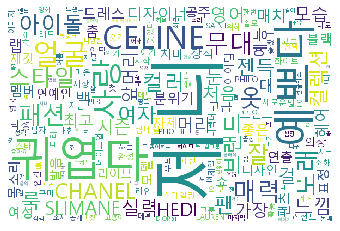

In [42]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('CE2JE.png')

In [43]:
CE2JE.to_csv('./magazine/final/CE2JE_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)